In [1]:
import pandas as pd
df=pd.read_csv("Alcohol_Sales.csv", index_col="DATE", parse_dates=True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [2]:
import numpy as np
import pandas as pd

In [3]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


<AxesSubplot:xlabel='DATE'>

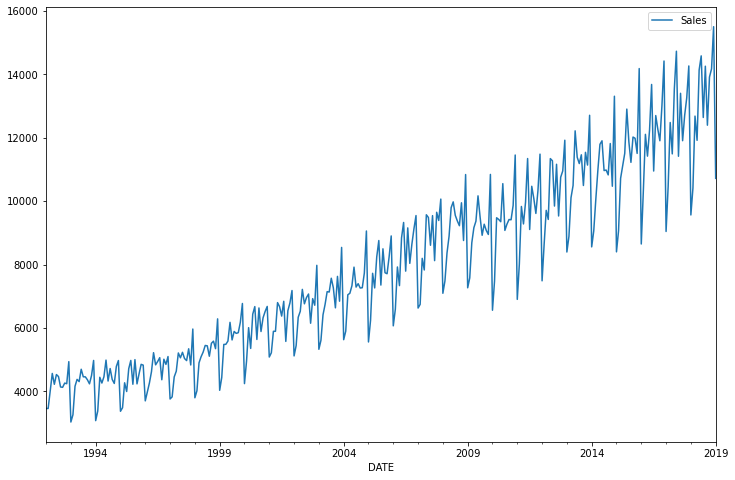

In [4]:
df.columns=['Sales']
df.plot(figsize=(12,8))


In [5]:
#Checking for Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest=adfuller(dataset, autolag="AIC")
    print("1 ADF",dftest[0])
    print("2 P-Value",dftest[1])
    print("3 Num of Lags",dftest[2])
    print("4 Num of observations used for ADF Regression:",dftest[3])
    print("5 Critical Values :")
    for key,val in dftest[4].items():
        print("\t",key," : ",val)

adf_test(df['Sales'])

1 ADF 2.037404725913701
2 P-Value 0.9987196267088919
3 Num of Lags 14
4 Num of observations used for ADF Regression: 310
5 Critical Values :
	 1%  :  -3.451621854687657
	 5%  :  -2.870908950689806
	 10%  :  -2.571761810613944


In [6]:
from pmdarima import auto_arima
stepwise_fit= auto_arima(df['Sales'],
                         supress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2696.878
Date:                Fri, 17 Dec 2021   AIC                           5399.757
Time:                        11:44:26   BIC                           5411.099
Sample:                             0   HQIC                          5404.284
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.1224      2.588     11.252      0.000      24.050      34.195
ma.L1         -0.9598      0.018    -53.911      0.000      -0.995      -0.925
sigma2      9.822e+05   6.74e+04     14.578      0.000     8.5e+05    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                19.75
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
df['Sales_LastMonth']=df['Sales'].shift(1)
df['Sales_2MonthsBack']=df['Sales'].shift(2)
df['Sales_3MonthsBack']=df['Sales'].shift(3)
df

,Sales,Sales_LastMonth,Sales_2MonthsBack,Sales_3MonthsBack
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [8]:
df1=df.copy()

In [9]:
df1=df.dropna()
df1=df1.reset_index(drop=True)
df1.head()


,Sales,Sales_LastMonth,Sales_2MonthsBack,Sales_3MonthsBack
0,4564,4002.0,3458.0,3459.0
1,4221,4564.0,4002.0,3458.0
2,4529,4221.0,4564.0,4002.0
3,4466,4529.0,4221.0,4564.0
4,4137,4466.0,4529.0,4221.0


In [11]:
X=df1.drop(['Sales'], axis=1)
X

,Sales_LastMonth,Sales_2MonthsBack,Sales_3MonthsBack
0,4002.0,3458.0,3459.0
1,4564.0,4002.0,3458.0
2,4221.0,4564.0,4002.0
3,4529.0,4221.0,4564.0
4,4466.0,4529.0,4221.0
...,...,...,...
317,14257.0,12640.0,14583.0
318,12396.0,14257.0,12640.0
319,13914.0,12396.0,14257.0
320,14174.0,13914.0,12396.0


In [13]:
x1, x2, x3, y = np.array(df1['Sales_LastMonth']).reshape(-1,1), np.array(df1['Sales_2MonthsBack']).reshape(-1,1), np.array(df1['Sales_3MonthsBack']).reshape(-1,1), np.array(df1['Sales']).reshape(-1,1)
X=np.concatenate((x1, x2, x3), axis=1)
X

array([[ 4002.,  3458.,  3459.],
       [ 4564.,  4002.,  3458.],
       [ 4221.,  4564.,  4002.],
       [ 4529.,  4221.,  4564.],
       [ 4466.,  4529.,  4221.],
       [ 4137.,  4466.,  4529.],
       [ 4126.,  4137.,  4466.],
       [ 4259.,  4126.,  4137.],
       [ 4240.,  4259.,  4126.],
       [ 4936.,  4240.,  4259.],
       [ 3031.,  4936.,  4240.],
       [ 3261.,  3031.,  4936.],
       [ 4160.,  3261.,  3031.],
       [ 4377.,  4160.,  3261.],
       [ 4307.,  4377.,  4160.],
       [ 4696.,  4307.,  4377.],
       [ 4458.,  4696.,  4307.],
       [ 4457.,  4458.,  4696.],
       [ 4364.,  4457.,  4458.],
       [ 4236.,  4364.,  4457.],
       [ 4500.,  4236.,  4364.],
       [ 4974.,  4500.,  4236.],
       [ 3075.,  4974.,  4500.],
       [ 3377.,  3075.,  4974.],
       [ 4443.,  3377.,  3075.],
       [ 4261.,  4443.,  3377.],
       [ 4460.,  4261.,  4443.],
       [ 4985.,  4460.,  4261.],
       [ 4324.,  4985.,  4460.],
       [ 4719.,  4324.,  4985.],
       [ 4

Random Forest Regressor

In [14]:

X_train, X_test, y_train, y_test =  X[:-30], X[-30:], y[:-30], y[-30:]


In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 3), (30, 3), (292, 1), (30, 1))

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
rfr_model.fit(X_train, y_train)
rfr_pred=rfr_model.predict(X_test)
rfr_pred

<ipython-input-16-f1e43ee1016a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train, y_train)


array([12319.49, 10738.58, 11679.46, 12570.51, 12081.07, 10311.81,
       10766.92, 11331.1 ,  9523.47, 11816.98, 11541.05, 10331.45,
       12662.42, 11520.24, 11154.75, 12012.44, 10680.35, 11663.51,
       11309.99, 11374.04,  9113.71, 11492.53, 11654.42, 10400.5 ,
       12020.88, 11648.62, 12561.32, 11883.8 , 11760.73, 11648.62])

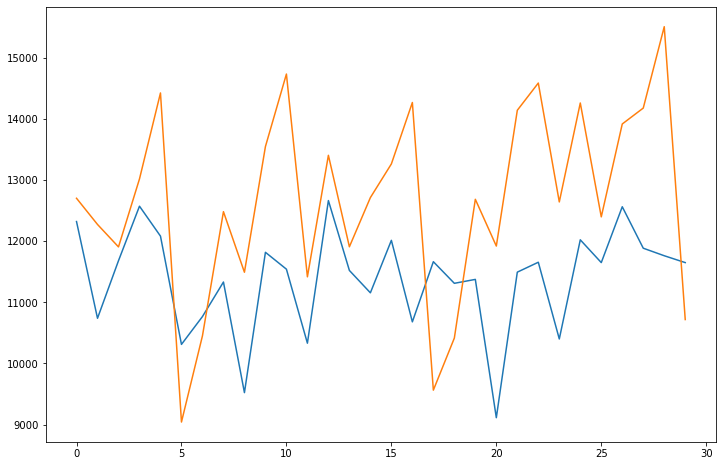

In [18]:
#Plotting predicted value and actual value
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(rfr_pred,label="Random Forest Regression Prediction")
plt.plot(y_test, label="Äctual Sales")
plt.show()

Linear Regression

In [19]:
X_train1=df1.drop(['Sales'], axis=1)[:-30]
X_test1=df1.drop(['Sales'], axis=1)[-30:]


In [35]:
X_train1.shape, X_test1.shape, y_train.shape, y_test.shape

((292, 3), (30, 3), (292, 1), (30, 1))

In [50]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train1, y_train.flatten())
lin_pred=lin_model.predict(X_test1)
lin_pred_df=pd.Series(lin_pred)
lin_pred_df

0     11827.384755
1     12429.623693
2     11791.527224
3     12074.349832
4     12343.489043
5     13079.542952
6     11402.580709
7     11270.454868
8     10810.701396
9     11254.700184
10    12545.652083
11    13201.556993
12    12655.706475
13    13154.287278
14    11928.878697
15    12557.272992
16    12513.065064
17    13311.561685
18    11668.380351
19    11320.135491
20    11048.933711
21    11472.092303
22    12956.387701
23    13397.715919
24    13333.200347
25    13744.648636
26    12699.604929
27    13443.985640
28    13318.085463
29    14412.261445
dtype: float64

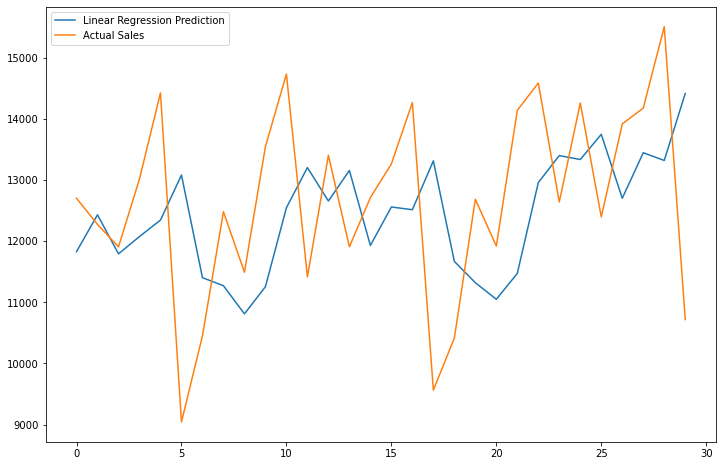

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(lin_pred_df,label="Linear Regression Prediction")
plt.plot(y_test,label="Actual Sales")
plt.legend(loc="upper left")
plt.show()

In [55]:
y_test.mean()

12664.1

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lin=sqrt(mean_squared_error(rfr_pred, y_test))
rmse_rfr=sqrt(mean_squared_error(lin_pred, y_test))

print('Mean Squared Error for Random Forest Model is : ', rmse_rfr)
print('Mean Squared Error for Linear Regression is : ', rmse_lin)

Mean Squared Error for Random Forest Model is :  1791.4965232759828
Mean Squared Error for Linear Regression is :  1913.7762399350665
